In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
'''
DOCUMENTACIÃN SOBRE LINEAR MODELS:
http://scikit-learn.org/stable/modules/linear_model.html
''' 


'\nDOCUMENTACIÃ\x93N SOBRE LINEAR MODELS:\nhttp://scikit-learn.org/stable/modules/linear_model.html\n'

In [2]:
'''
multiple linear regression:
The idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out 
the appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters 
in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).
fuente: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
'''

"\nmultiple linear regression:\nThe idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out \nthe appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters \nin order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).\nfuente: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/\n"

In [3]:
#VERSIÃN DE: http://charlesfranzen.com/posts/multiple-regression-in-python-gradient-descent/
import math
import random
import numpy as np

# get the cost (error) of the model
def computeCost(y_true, y_predicted):  
    inner = np.power((y_predicted - y_true), 2)
    return np.sum(inner) / (len(X))

def predict_output(feature_matrix, coefficients):
    ''' Returns an array of predictions
    
    inputs - 
        feature_matrix - 2-D array of dimensions data points by features
        coefficients - 1-D array of estimated feature coefficients
        
    output - 1-D array of predictions
    '''
    predictions = np.dot(feature_matrix, coefficients)
    return predictions

def feature_derivative(errors, feature):
    N = len(feature)
    derivative = (2)*np.dot(errors, feature)
    return(derivative)

def gradient_descent_regression(H, y, initial_coefficients, eta, epsilon, max_iterations=10000):
    ''' Returns coefficients for multiple linear regression.
    
    inputs - 
        H - 2-D array of dimensions data points by features
        y - 1-D array of true output
        initial_coefficients - 1-D array of initial coefficients
        eta - float, the step size eta
        epsilon - float, the tolerance at which the algorithm will terminate
        max_iterations - int, tells the program when to terminate
    
    output - 1-D array of estimated coefficients
    '''
    converged = False
    w = initial_coefficients
    iteration = 0
    cost=[]
    while iteration < max_iterations:
        pred = predict_output(H, w)
        residuals = pred-y
        gradient_sum_squares = 0
        for i in range(len(w)):
            partial = feature_derivative(residuals, H[:, i])
            gradient_sum_squares += partial**2
            w[i] = w[i] - eta*partial
        '''gradient_magnitude = math.sqrt(gradient_sum_squares)  TOCHECK
           if gradient_magnitude < epsilon:
            converged = True'''
        iteration += 1
        cost.append(computeCost(y, pred))
    return w, cost



In [4]:
def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " +                          "not be normalized. Please do not include features with only a single value " +                          "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

#ENCONTRAR EL COEFF. DE REGRESIÃN LINEAL: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def find_r2_score(labels_test, predicted_outputs):
    from sklearn.metrics import r2_score
    corr_coeff = r2_score(labels_test, predicted_outputs)
    print('the value of r2 is: ', corr_coeff)



In [5]:
#predicciones con gradient_descent_data_identity_2D.csv:
import pandas as pd
from pandas import DataFrame, Series 
import numpy as np
'''
from azureml import Workspace
ws = Workspace(
    workspace_id='b692ccad88f84e139ce2040473db008f',
    authorization_token='Z6AoPT8cBvrepyHGXuilNqTfGMH2dOws60ak0Bpapx+K20mGq179RcgLIZp/28qyzb+jDDYeTyVH1nHHRLzh9Q==',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['gradient_descent_data_identity_2D.csv']
final_df = ds.to_dataframe() 
'''
final_df = pd.read_csv(r'.\data\gradient_descent_data_identity.csv', sep=';')
#split dataframe into columns
final_df.rename(columns={'Y': 'W'}, inplace=True)


In [6]:
'''
final_df[['X', 'Y','W']] = pd.DataFrame(
      [x.split(';;') for x in final_df['X;;Y;;W'].tolist()])
'''
#construyo el features dataframe
X = final_df['X']
#Y = final_df['Y']
TARGET = final_df['W']

In [7]:
X = pd.to_numeric(X)
#Y = pd.to_numeric(Y)
TARGET = 2*(pd.to_numeric(TARGET))
#meto cierta desviaciÃ³n en datos apra que no salga perfectamente 1
TARGET[10:18] = np.multiply(TARGET[10:18], 0.8)   
TARGET[30:48] = np.multiply(TARGET[30:48], 1.1)
#ahora creo el dictionary:
final_df_DICT = {'X': X}
#y ahora el dataframe
H = pd.DataFrame(final_df_DICT) 


In [8]:
n = len(H['X'])
#feature_matrix hace de training data 
feature_matrix = np.zeros(n*2) 
feature_matrix.shape = (n, 2) 
feature_matrix[:,0] = 1 
feature_matrix[:,1] = H['X'] 
#feature_matrix[:,2] = H['Y']


In [10]:
#normalize features# normalize features: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
feature_matrix, mu, sigma = normalize_features(feature_matrix)

initial_coefficients = np.zeros(len(feature_matrix[0]))

#gradient_descent_regression(H, y, initial_coefficients, eta, epsilon, max_iterations=10000)
coef, cost = gradient_descent_regression(feature_matrix, TARGET, initial_coefficients, 6e-5, 1) 
print('coef: {}'.format(coef))
print('cost: {}'.format(cost[-1]))



coef: [-67.98837709  64.19551595]
cost: 13.268601353735384


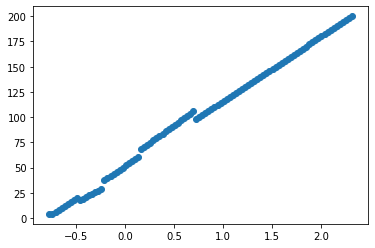

In [13]:
#el Ãºltimo elemento de la serie 'cost' es '0.1308', igual que el coste computado siguiente:
my_predictions = predict_output(feature_matrix, coef)
computeCost(TARGET, my_predictions) 

from matplotlib import pyplot

pyplot.scatter(feature_matrix[:, 1], TARGET)
#pyplot.plot(x, yhat_whole_ds, color='y')
#pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()


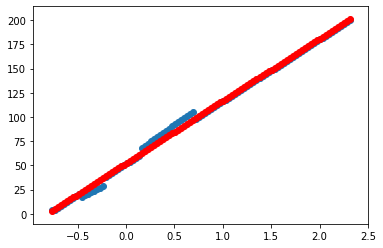

In [15]:
#el Ãºltimo elemento de la serie 'cost' es '0.1308', igual que el coste computado siguiente:
my_predictions = predict_output(feature_matrix, coef)
computeCost(TARGET, my_predictions) 

from matplotlib import pyplot

pyplot.scatter(feature_matrix[:, 1], TARGET)
pyplot.scatter(feature_matrix[:, 1], my_predictions, color='r')
#pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()



######################################

 Repito con otro dataset:

 Repito con otro dataset:

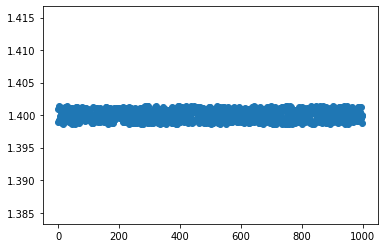

In [18]:
import numpy as np 
from numpy.random import randn, seed
'''
x_data = 20 * randn(1000) + 100
y_data = x_data + (10 * randn(1000) + 50)
'''
n=1000
t=1.4
sigma_R = t*0.001
min_value_t = t-sigma_R
max_value_t = t+sigma_R
y_data = min_value_t + (max_value_t - min_value_t) * np.random.rand(n,1)
x_data=np.array(range(1000))

pyplot.scatter(x_data, y_data)
pyplot.show()





######################################


In [24]:
final_df=pd.DataFrame({'X': x_data, 'W': y_data.reshape(len(y_data), )})
#construyo el features dataframe
X = final_df['X']
TARGET = final_df['W']
X = pd.to_numeric(X)
#Y = pd.to_numeric(Y)
TARGET = pd.to_numeric(TARGET)
#ahora creo el dictionary:
final_df_DICT = {'X': X}
#y ahora el dataframe
H = pd.DataFrame(final_df_DICT)



######################################

In [25]:
n = len(H['X'])
#feature_matrix hace de training data 
feature_matrix = np.zeros(n*2) 
feature_matrix.shape = (n, 2) 
feature_matrix[:,0] = 1 
feature_matrix[:,1] = H['X'] 


In [26]:
#normalize features# normalize features: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
feature_matrix, mu, sigma = normalize_features(feature_matrix)

initial_coefficients = np.zeros(len(feature_matrix[0]))

coef, cost = gradient_descent_regression(feature_matrix, TARGET, initial_coefficients, 6e-5, 1) 
print('coef: {}'.format(coef))
print('cost: {}'.format(cost[-1]))



coef: [-1.80963253e+00 -6.15189807e-06]
cost: 6.466287828899486e-07


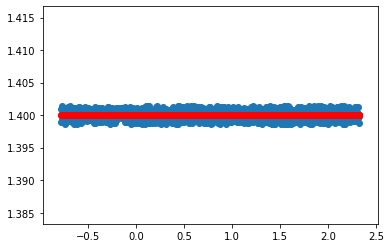

In [27]:
#el Ãºltimo elemento de la serie 'cost' es '0.1308', igual que el coste computado siguiente:
my_predictions = predict_output(feature_matrix, coef)
computeCost(TARGET, my_predictions) 

from matplotlib import pyplot

pyplot.scatter(feature_matrix[:, 1], TARGET)
pyplot.scatter(feature_matrix[:, 1], my_predictions, color='r')
#pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()


In [28]:
#normalize features# normalize features: http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
feature_matrix, mu, sigma = normalize_features(feature_matrix)

initial_coefficients = np.zeros(len(feature_matrix[0]))

coef, cost = gradient_descent_regression(feature_matrix, TARGET, initial_coefficients, 0.0001, 1, max_iterations=1000) 
print('coef: {}'.format(coef))
print('cost: {}'.format(cost[-1]))



coef: [-1.80963253e+00 -6.15189807e-06]
cost: 6.466287828899525e-07


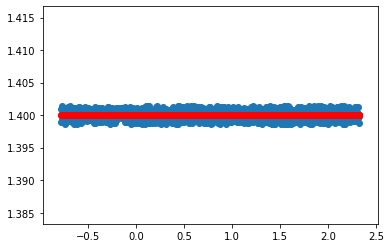

In [29]:
#el Ãºltimo elemento de la serie 'cost' es '0.1308', igual que el coste computado siguiente:
my_predictions = predict_output(feature_matrix, coef)
computeCost(TARGET, my_predictions) 

from matplotlib import pyplot

pyplot.scatter(feature_matrix[:, 1], TARGET)
pyplot.scatter(feature_matrix[:, 1], my_predictions, color='r')
#pyplot.plot(x, yhat_bootstrapped, color='r')
pyplot.show()


# Ejemplo para DS exchange question:

In [57]:
n=1000
t=1.4
sigma_R = t*0.001
min_value_t = t-sigma_R
max_value_t = t+sigma_R
y_data = min_value_t + (max_value_t - min_value_t) * np.random.rand(n,1)
x_data=np.array(range(1000))

final_df_DICT = {'X': x_data}
H = pd.DataFrame(final_df_DICT)
feature_matrix = np.zeros(n*2) 
feature_matrix.shape = (n, 2) 
feature_matrix[:,0] = 1 
feature_matrix[:,1] = H['X'] 
#normalize features
feature_matrix = (feature_matrix - feature_matrix.mean()) / feature_matrix.std()

target_data = y_data.reshape(len(y_data), )

In [58]:
w = [0, 0]
L=0.0001
epochs=1000
iteration = 0
cost=[]
while iteration < epochs:
    pred = np.dot(feature_matrix, w)
    residuals = pred-target_data
    gradient_sum_squares = 0
    for i in range(len(w)):
        partial = 2*np.dot(residuals, feature_matrix[:, i])
        gradient_sum_squares += partial**2
        w[i] = w[i] - L*partial
    '''gradient_magnitude = math.sqrt(gradient_sum_squares)  TOCHECK
        if gradient_magnitude < epsilon:
        converged = True'''
    iteration += 1
    computed_cost = np.sum(np.power((pred - target_data), 2)) / n

    cost.append(computed_cost)

print('coef: {}'.format(coef))
print('cost: {}'.format(cost[-1]))

coef: [-1.80963253e+00 -6.15189807e-06]
cost: 6.513934385771101e-07


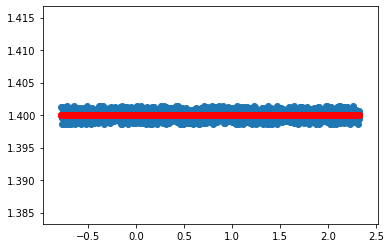

In [59]:
from matplotlib import pyplot

my_predictions = np.dot(feature_matrix, coef)
pyplot.scatter(feature_matrix[:, 1], target_data)
pyplot.scatter(feature_matrix[:, 1], my_predictions, color='r')

pyplot.show()
